In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import streamlit as st

In [2]:
df = pd.read_csv('weatherdata.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [3]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [4]:
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [5]:
df.tail(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8774,12/31/2012 14:00,-3.4,-5.7,84,6,11.3,100.57,Snow
8775,12/31/2012 15:00,-2.3,-4.6,84,9,9.7,100.47,Snow
8776,12/31/2012 16:00,-1.4,-4.0,82,13,12.9,100.40,Snow
8777,12/31/2012 17:00,-1.1,-3.3,85,19,9.7,100.30,Snow
8778,12/31/2012 18:00,-1.3,-3.1,88,17,9.7,100.19,Snow
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [7]:
df[['Date', 'Time']] = df['Date/Time'].str.split(' ', expand = True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1:00


In [10]:
# Getting seasons and seperating the month into a new column
def get_season(month):
    if month >=3 and month <= 5:
        return 'Spring'
    elif month>= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)

In [11]:
# Rearrange columns
df = df[['Date', 'Month', 'Time', 'Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km' ,'Press_kPa', 'Weather', 'Season']]
df = df.reset_index()

In [12]:
df.head()

,index,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,0,2012-01-01,1,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,1,2012-01-01,1,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter
2,2,2012-01-01,1,2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Winter
3,3,2012-01-01,1,3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Winter
4,4,2012-01-01,1,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Winter


In [13]:
weather_count = len(df['Weather'].unique())

print('There are {} different weathers'.format(weather_count))

There are 50 different weathers


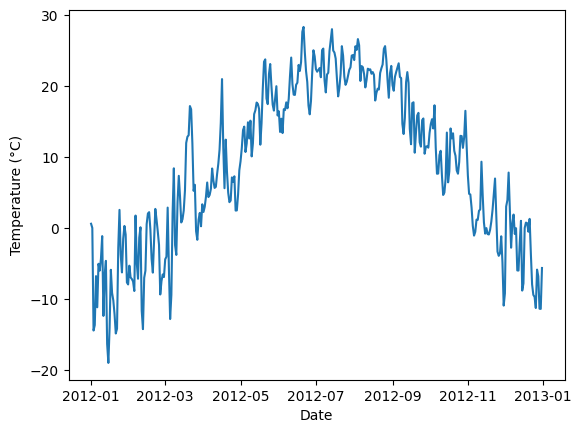

In [14]:
sns.lineplot(x ="Date", y = "Temp_C", data= df, errorbar= None)
plt.ylabel("Temperature (°C)");

In [15]:
df.head(2)

,index,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,0,2012-01-01,1,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,1,2012-01-01,1,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter


In [16]:
# Making the month their name value
import calendar

df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])


In [17]:
df.head(2)


,index,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,0,2012-01-01,January,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
1,1,2012-01-01,January,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter


In [18]:
# Rearranging the columns
df = df[['Date', 'Month', 'Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 
             'Visibility_km', 'Press_kPa', 'Weather', 'Season']]


In [19]:
9df.head(2)

SyntaxError: invalid decimal literal (1699327085.py, line 1)

In [ ]:
# Replacing the column name weather with weather comdition
df.rename(columns = {'Weather': 'Weather Condition'}, inplace = True)

In [ ]:
sf = df.head(2000)
sf

,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,Season
Date,,,,,,,,,,
2012-01-01,January,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Winter
2012-01-01,January,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Winter
2012-01-01,January,2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Winter
2012-01-01,January,3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Winter
2012-01-01,January,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Winter
...,...,...,...,...,...,...,...,...,...,...
2012-03-24,March,3:00,5.3,-9.4,34,22,25.0,101.86,Mostly Cloudy,Spring
2012-03-24,March,4:00,4.4,-8.9,37,13,25.0,101.88,Cloudy,Spring
2012-03-24,March,5:00,3.6,-8.5,41,19,25.0,101.89,Cloudy,Spring


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking all the unique values in my dataset
df.nunique()

Date                 366
Month                 12
Time                  24
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather Condition     50
Season                 4
dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_11544\356481979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x= 'Month', y= 'Temp_C', palette="coolwarm")


<Axes: xlabel='Month', ylabel='Temp_C'>

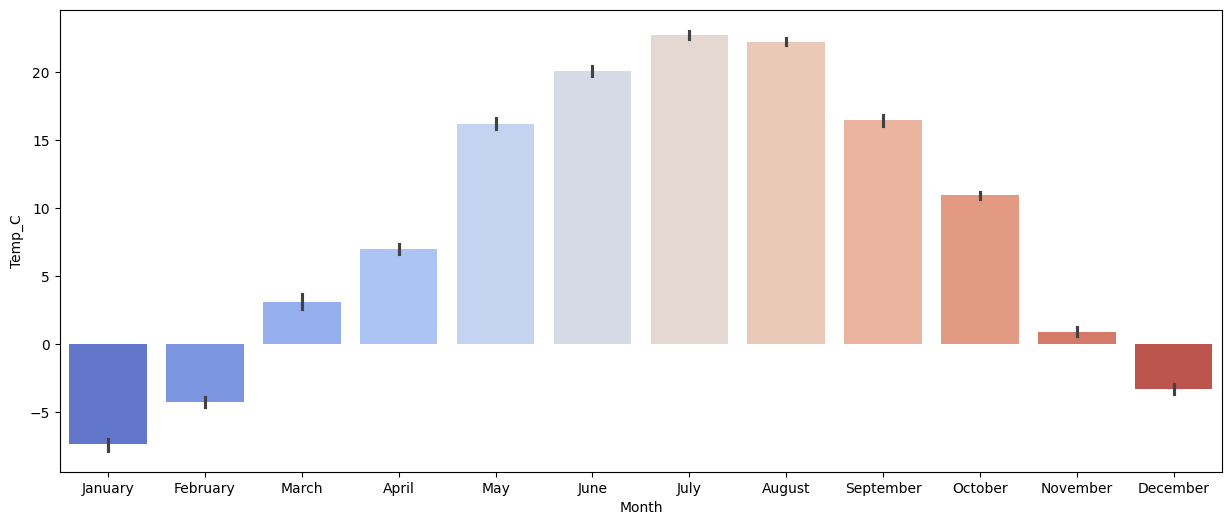

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(df, x= 'Month', y= 'Temp_C', palette="coolwarm")

In [ ]:
# Checking the frequency of each weather condition
df['Weather Condition'].value_counts()

Weather Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [ ]:
# Getting all the unique Windspeed values
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [ ]:
# Getting all the unique Windspeed values
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [ ]:
# Number of times each Windspeed value appeared
df['Wind Speed_km/h'].value_counts()

Wind Speed_km/h
9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
70      1
83      1
63      1
54      1
Name: count, dtype: int64

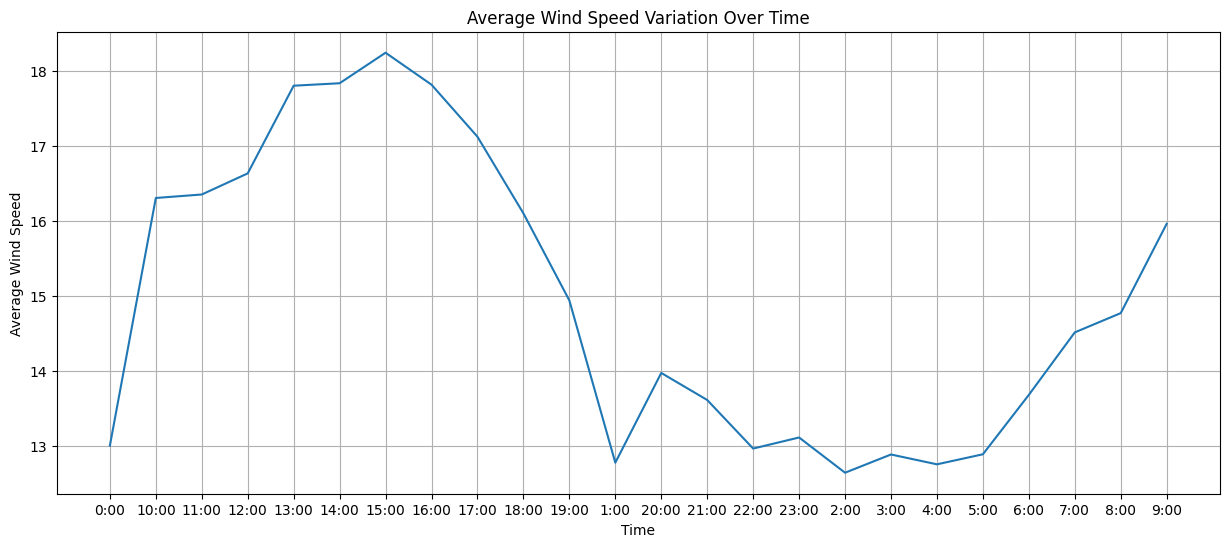

In [ ]:
# Checking if there's any relationship between windspeed and time

avg_windspeed = df.groupby('Time')['Wind Speed_km/h'].mean()
plt.figure(figsize=(15, 6))

plt.plot(avg_windspeed.index, avg_windspeed.values)
plt.xlabel('Time')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed Variation Over Time')
plt.grid()


In [ ]:
# What is the mean 'Visibility' in the dataset?

mean_visibility = df['Visibility_km'].mean().round(2)
print(f'The mean visibility of the data is {mean_visibility}km')


The mean visibility of the data is 27.66km


In [ ]:
# Find all the instances where 'Snow' was recorded.

df[df['Weather Condition'].str.contains('Snow')]

,Date,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,Season
41,2012-01-02,January,17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,Winter
44,2012-01-02,January,20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,Winter
45,2012-01-02,January,21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,Winter
47,2012-01-02,January,23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,Winter
48,2012-01-03,January,0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,Winter
...,...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31,December,19:00,0.1,-2.7,81,30,9.7,100.13,Snow,Winter
8780,2012-12-31,December,20:00,0.2,-2.4,83,24,9.7,100.03,Snow,Winter
8781,2012-12-31,December,21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Winter
8782,2012-12-31,December,22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Winter


In [ ]:
avg_temp = df.groupby('Season')['Temp_C'].mean()
avg_temp

Season
Autumn     9.473397
Spring     8.808786
Summer    21.751857
Winter    -4.983929
Name: Temp_C, dtype: float64

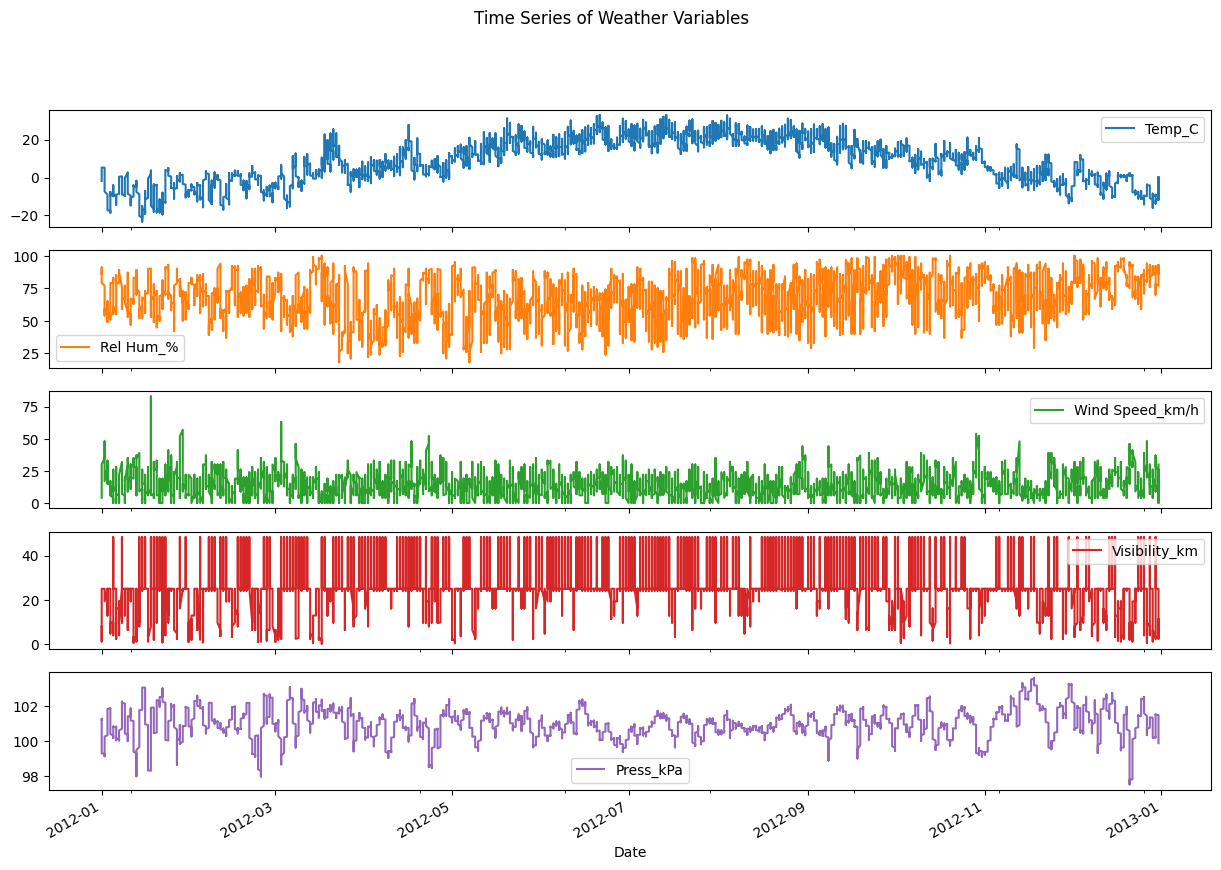

In [ ]:
df.set_index('Date', inplace=True)
df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].plot(subplots=True, figsize=(15, 10))
plt.suptitle('Time Series of Weather Variables')
plt.show()

In [ ]:
weather_windspeed = df.groupby('Weather Condition')['Wind Speed_km/h'].mean().reset_index()

In [ ]:
weather_windspeed.head(2)

,Weather Condition,Wind Speed_km/h
0,Clear,10.557315
1,Cloudy,16.127315


In [ ]:
weather_windspeed = weather_windspeed.sort_values('Wind Speed_km/h', ascending = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11544\1265117920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Wind Speed_km/h', y = 'Weather Condition', data = weather_windspeed, palette="spring")


Text(0.5, 1.0, 'Relationship between Weather Condition and Windspeed')

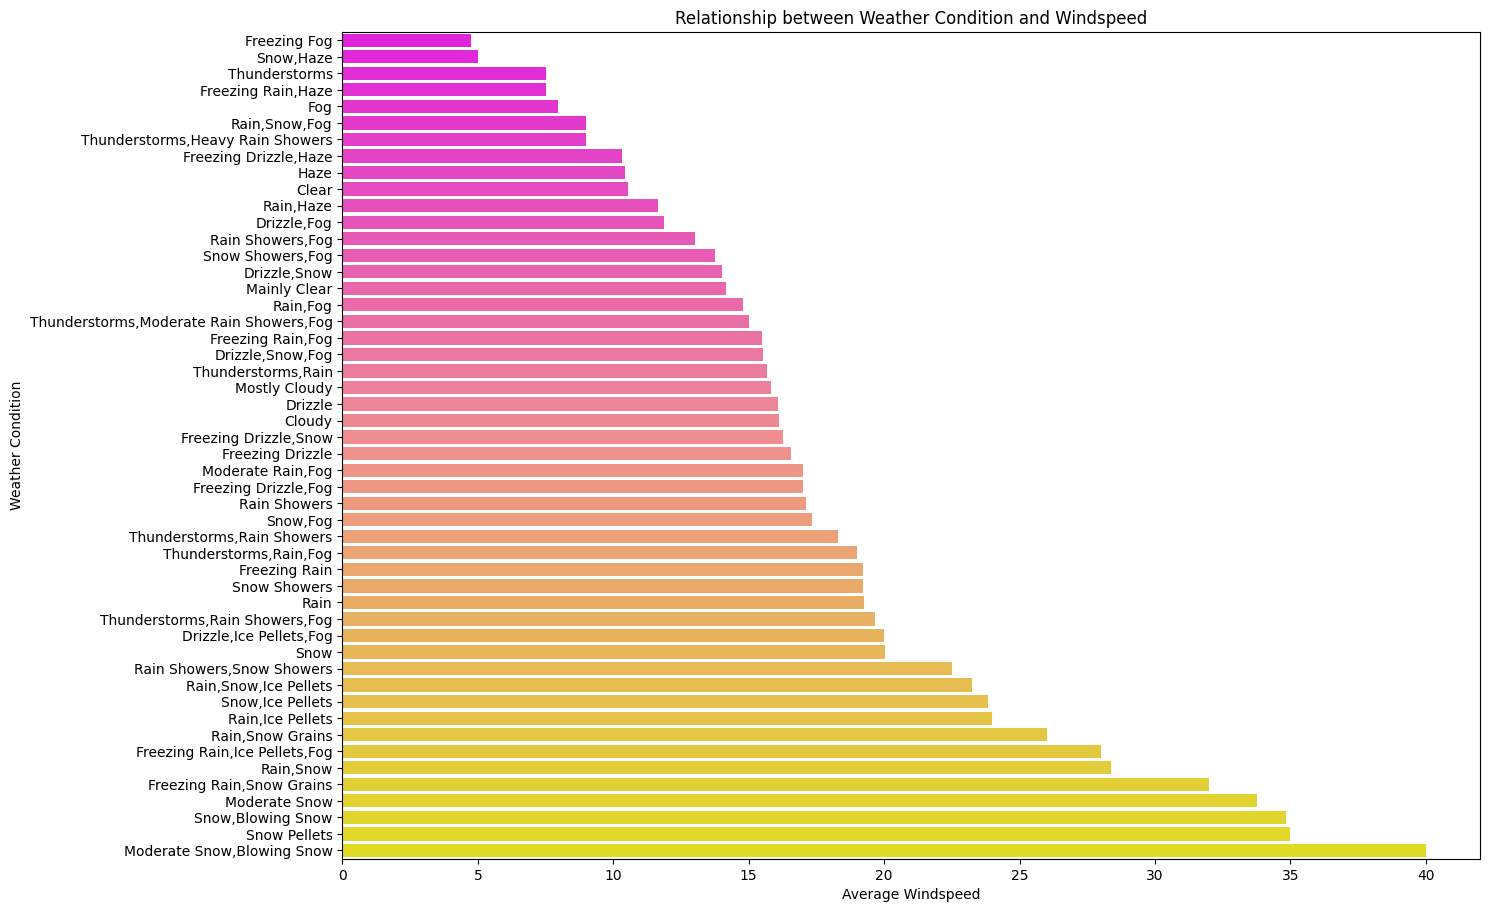

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'Wind Speed_km/h', y = 'Weather Condition', data = weather_windspeed, palette="spring")
plt.xlabel('Average Windspeed')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.title('Relationship between Weather Condition and Windspeed')

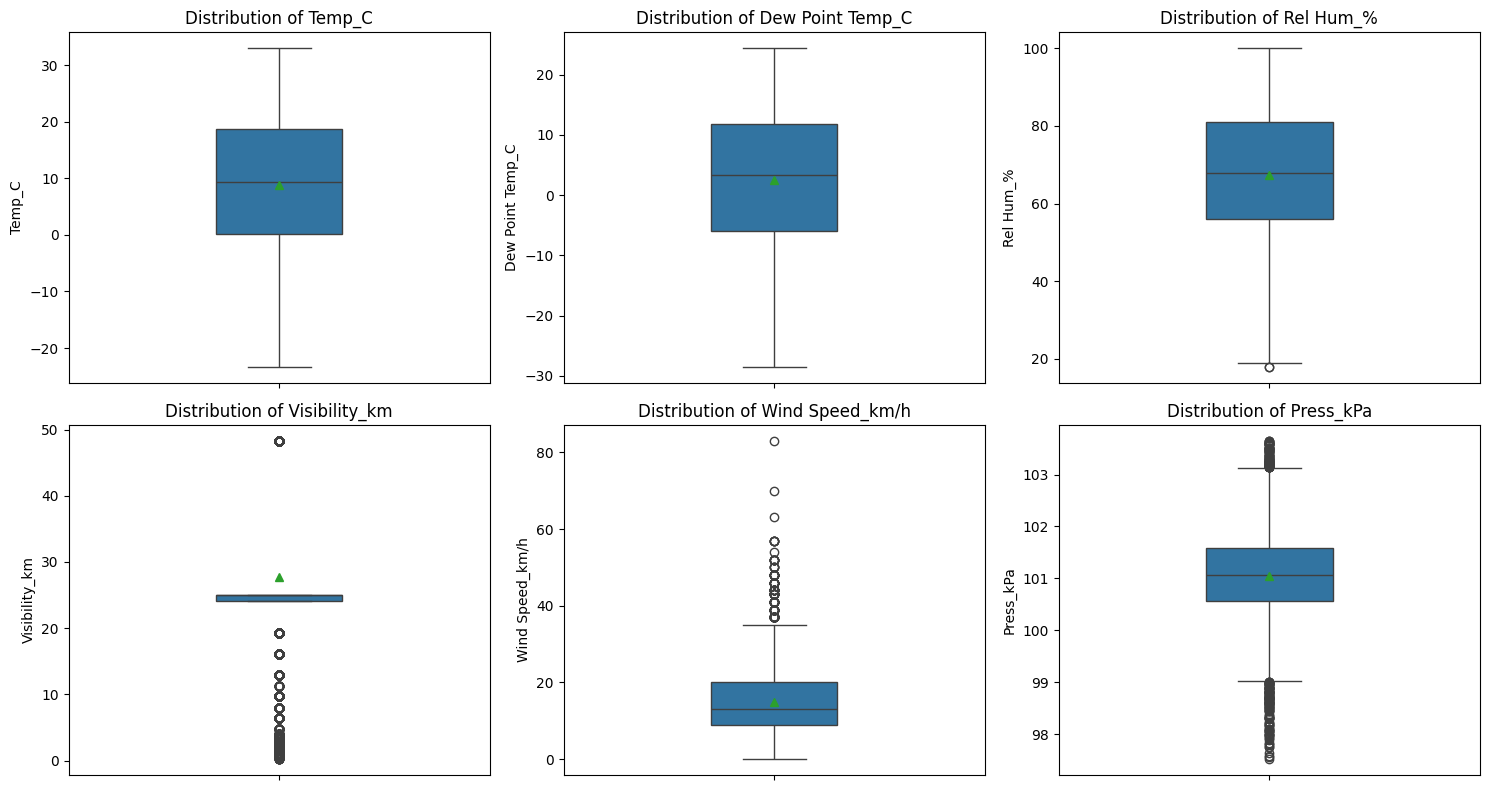

In [ ]:
# Parameters to plot
params = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km', 'Wind Speed_km/h', 'Press_kPa']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes array if necessary

# Loop through the list of parameters and create a boxplot for each
for i, param in enumerate(params):
    sns.boxplot(y=param, data=df, width=0.3, showmeans=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {param}')

# Adjust layout
plt.tight_layout()

In [ ]:
correlation_matrix = df.corr(numeric_only= True)

In [ ]:
correlation_matrix.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847


Text(0.5, 1.0, 'Correlation Matrix')

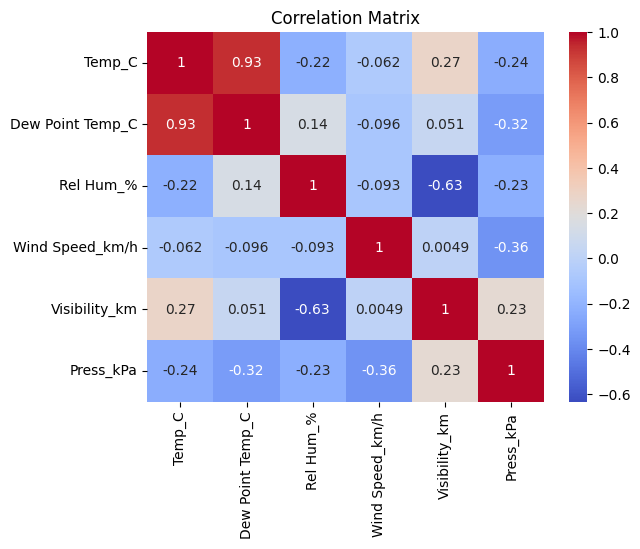

In [ ]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

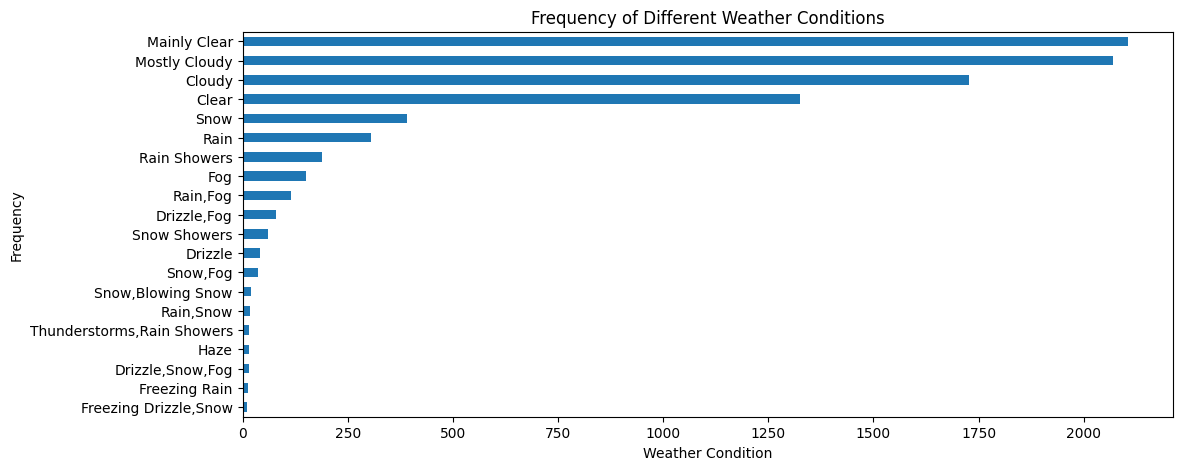

In [ ]:
weather_counts = df['Weather Condition'].value_counts(ascending=True)[-20:]
weather_counts.plot(kind='barh', figsize=(12, 5))
plt.title('Frequency of Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_11544\4212986625.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Weather Condition', y='Count', hue='Season', ci=None)


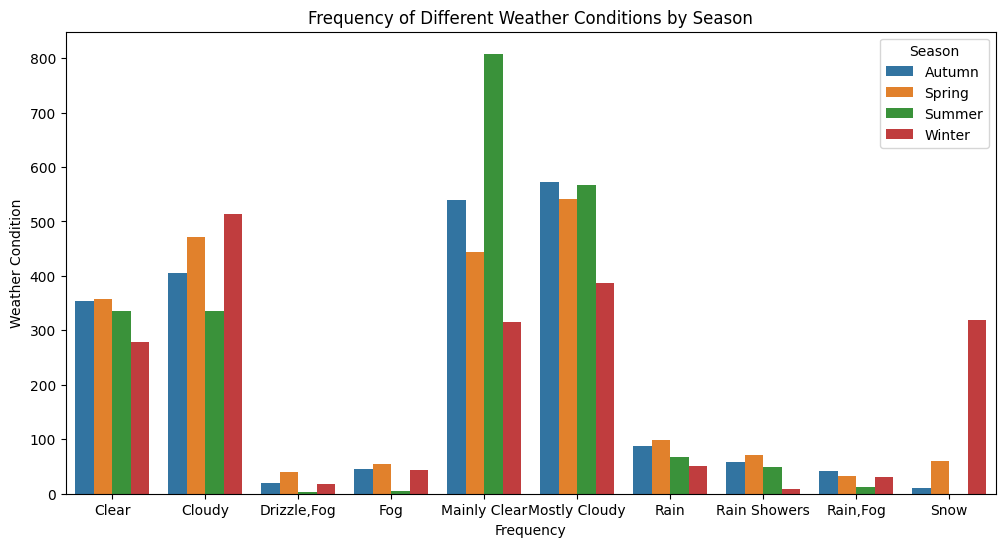

In [ ]:
# Grouping the data by 'Season' and 'Weather Condition' and count the occurrences
grouped_data = df.groupby(['Season', 'Weather Condition']).size().reset_index(name='Count')

# Getting the top 20 weather conditions across all seasons
top_conditions = grouped_data.groupby('Weather Condition')['Count'].sum().nlargest(10).index

# Filter the original grouped data to include only the top conditions
filtered_data = grouped_data[grouped_data['Weather Condition'].isin(top_conditions)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Weather Condition', y='Count', hue='Season', ci=None)
plt.title('Frequency of Different Weather Conditions by Season')
plt.xlabel('Frequency')
plt.ylabel('Weather Condition')
plt.legend(title='Season')
plt.show()

In [ ]:
df.groupby('Weather Condition').mean(numeric_only= True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857
